In [2]:
import torch
import math

In [3]:
math.tanh(-2.2)

-0.9757431300314515

In [4]:
math.tanh(.1)

0.09966799462495582

In [5]:
math.tanh(2.5)

0.9866142981514303

In [8]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

n_samples = t_c.shape[0]
randper = torch.randperm(n_samples)

split_size = int(n_samples * 0.2)


indices_train = randper[split_size:]
indices_val = randper[:split_size]


t_c_train = t_c[indices_train]
t_u_train = t_u[indices_train]

t_c_val = t_c[indices_val]
t_u_val = t_u[indices_val]
t_c_val, t_c_train

(tensor([-4., 11.]),
 tensor([ 8.0000, 14.0000, 21.0000, 15.0000,  0.5000, 28.0000, 13.0000,  3.0000,
          6.0000]))

In [9]:
t_un_val = t_u_val * .1
t_un_train = t_u_train *.1

In [22]:
import torch.nn as nn

linear_model = nn.Linear(1, 1)
linear_model(t_un_val.unsqueeze(-1))

tensor([[-0.0756],
        [ 0.9315]], grad_fn=<AddmmBackward>)

In [23]:
linear_model.weight

Parameter containing:
tensor([[0.2919]], requires_grad=True)

In [24]:
linear_model.bias

Parameter containing:
tensor([-0.7120], requires_grad=True)

In [75]:
x = torch.ones(1)
linear_model(x), x

(tensor([-0.4201], grad_fn=<AddBackward0>), tensor([1.]))

In [115]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

n_samples = t_c.shape[0]
split_size = int(n_samples * 0.2)
indices = torch.randperm(n_samples)

t_c_val = t_c[indices[:split_size]]
t_u_val = t_u[indices[:split_size]]

t_c_train = t_c[indices[split_size:]]
t_u_train = t_u[indices[split_size:]]
t_c_val, t_c_train

(tensor([[14.],
         [ 6.]]),
 tensor([[-4.0000],
         [28.0000],
         [15.0000],
         [13.0000],
         [ 0.5000],
         [ 3.0000],
         [11.0000],
         [21.0000],
         [ 8.0000]]))

In [116]:
import torch.optim as optim

linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2)

In [117]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(f"epoch {epoch}, training loss {loss_train.item():.4f},"
                  f"Validation loss {loss_val.item():.4f}")

In [119]:
training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_u_train * 0.1,
    t_c_train = t_c_train,
    t_u_val = t_u_val * 0.1,
    t_c_val = t_c_val)

epoch 1, training loss 2.5643,Validation loss 4.7452
epoch 1000, training loss 2.5641,Validation loss 4.7304
epoch 2000, training loss 2.5641,Validation loss 4.7285
epoch 3000, training loss 2.5641,Validation loss 4.7284


In [120]:
print(linear_model.weight)
print(linear_model.bias)

Parameter containing:
tensor([[5.3166]], requires_grad=True)
Parameter containing:
tensor([-16.8875], requires_grad=True)


In [121]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [126]:
list(seq_model.parameters())

[Parameter containing:
 tensor([[-0.7821],
         [-0.3329],
         [ 0.8710],
         [ 0.0422],
         [-0.2993],
         [-0.7991],
         [-0.3902],
         [ 0.7711],
         [-0.0028],
         [ 0.6767],
         [ 0.7736],
         [ 0.0608],
         [-0.0527]], requires_grad=True),
 Parameter containing:
 tensor([-0.6248, -0.4595, -0.9742, -0.9776, -0.5290, -0.2905, -0.1921,  0.1610,
          0.6033, -0.8139,  0.7244, -0.1463,  0.0848], requires_grad=True),
 Parameter containing:
 tensor([[-0.2121,  0.2283,  0.0700,  0.1206,  0.1725,  0.1468,  0.1173,  0.2359,
           0.1621,  0.1342, -0.0647,  0.1875,  0.0889]], requires_grad=True),
 Parameter containing:
 tensor([0.0791], requires_grad=True)]

In [130]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [214]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 60)),
    ('hidden_activation', nn.Tanh()),
    ('hidden_linear2', nn.Linear(60, 45)),
    ('hidden_activation2', nn.Tanh()),
    ('hidden_linear3', nn.Linear(45, 22)),
    ('hidden_activation3', nn.Tanh()),
    ('output_layer', nn.Linear(22, 1))
]))

In [215]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([60, 1])
hidden_linear.bias torch.Size([60])
hidden_linear2.weight torch.Size([45, 60])
hidden_linear2.bias torch.Size([45])
hidden_linear3.weight torch.Size([22, 45])
hidden_linear3.bias torch.Size([22])
output_layer.weight torch.Size([1, 22])
output_layer.bias torch.Size([1])


In [216]:
print(seq_model)

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=60, bias=True)
  (hidden_activation): Tanh()
  (hidden_linear2): Linear(in_features=60, out_features=45, bias=True)
  (hidden_activation2): Tanh()
  (hidden_linear3): Linear(in_features=45, out_features=22, bias=True)
  (hidden_activation3): Tanh()
  (output_layer): Linear(in_features=22, out_features=1, bias=True)
)


In [217]:
seq_model.output_layer.weight

Parameter containing:
tensor([[ 0.1735,  0.0567,  0.1003,  0.0220, -0.1016,  0.1026,  0.1692, -0.0108,
         -0.0856, -0.2106,  0.2066,  0.0046, -0.0049,  0.1400,  0.2084, -0.1551,
          0.2074,  0.1704, -0.1015, -0.0983,  0.0928, -0.0981]],
       requires_grad=True)

In [226]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-4*9)

training_loop(n_epochs=50000,
              optimizer=optimizer,
              model=seq_model,
              loss_fn=nn.MSELoss(),
              t_u_train=t_u_train * .1,
              t_c_train=t_c_train,
              t_u_val=t_u_val * .1,
              t_c_val=t_c_val)

epoch 1, training loss 0.3529,Validation loss 6.6768
epoch 1000, training loss 0.3618,Validation loss 6.0860
epoch 2000, training loss 0.3540,Validation loss 6.5121
epoch 3000, training loss 0.3527,Validation loss 6.6276
epoch 4000, training loss 0.3520,Validation loss 6.6961
epoch 5000, training loss 0.3535,Validation loss 6.3477
epoch 6000, training loss 0.3517,Validation loss 6.5220
epoch 7000, training loss 0.3508,Validation loss 6.6292
epoch 8000, training loss 0.3499,Validation loss 6.7358
epoch 9000, training loss 0.3514,Validation loss 6.7996
epoch 10000, training loss 0.3503,Validation loss 6.8326
epoch 11000, training loss 0.3469,Validation loss 6.8806
epoch 12000, training loss 0.3369,Validation loss 6.9027
epoch 13000, training loss 0.3227,Validation loss 6.8908
epoch 14000, training loss 0.3099,Validation loss 6.8748
epoch 15000, training loss 0.2967,Validation loss 6.8608
epoch 16000, training loss 0.2802,Validation loss 6.8520
epoch 17000, training loss 0.2599,Validation

In [227]:
print('output', seq_model(t_u_train * .1))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

output tensor([[-4.0007],
        [27.9988],
        [15.0005],
        [13.0029],
        [ 0.5016],
        [ 3.0010],
        [10.9949],
        [20.9929],
        [ 7.9986]], grad_fn=<AddmmBackward>)
answer tensor([[14.],
        [ 6.]])
hidden tensor([[-2.4811e-03],
        [ 2.9644e-04],
        [ 4.6989e-03],
        [-3.0290e-04],
        [ 1.5780e-04],
        [-9.7888e-07],
        [-3.0157e-02],
        [-1.3248e-05],
        [ 6.0172e-02],
        [-1.7936e-03],
        [-4.7665e-03],
        [ 1.8795e-04],
        [ 1.0802e-05],
        [ 4.4761e-02],
        [ 1.3027e-06],
        [-3.8809e-02],
        [-3.8711e-02],
        [ 6.4213e-06],
        [-6.1712e-02],
        [ 1.0096e-04],
        [-4.4704e-02],
        [ 4.1129e-02],
        [-9.4103e-06],
        [ 8.6595e-05],
        [-5.1442e-02],
        [ 3.9938e-06],
        [-1.0858e-03],
        [ 6.7972e-06],
        [ 9.9525e-07],
        [-4.8845e-06],
        [ 5.1562e-06],
        [-6.1171e-02],
        [-6.176

In [228]:
from matplotlib import pyplot as plt

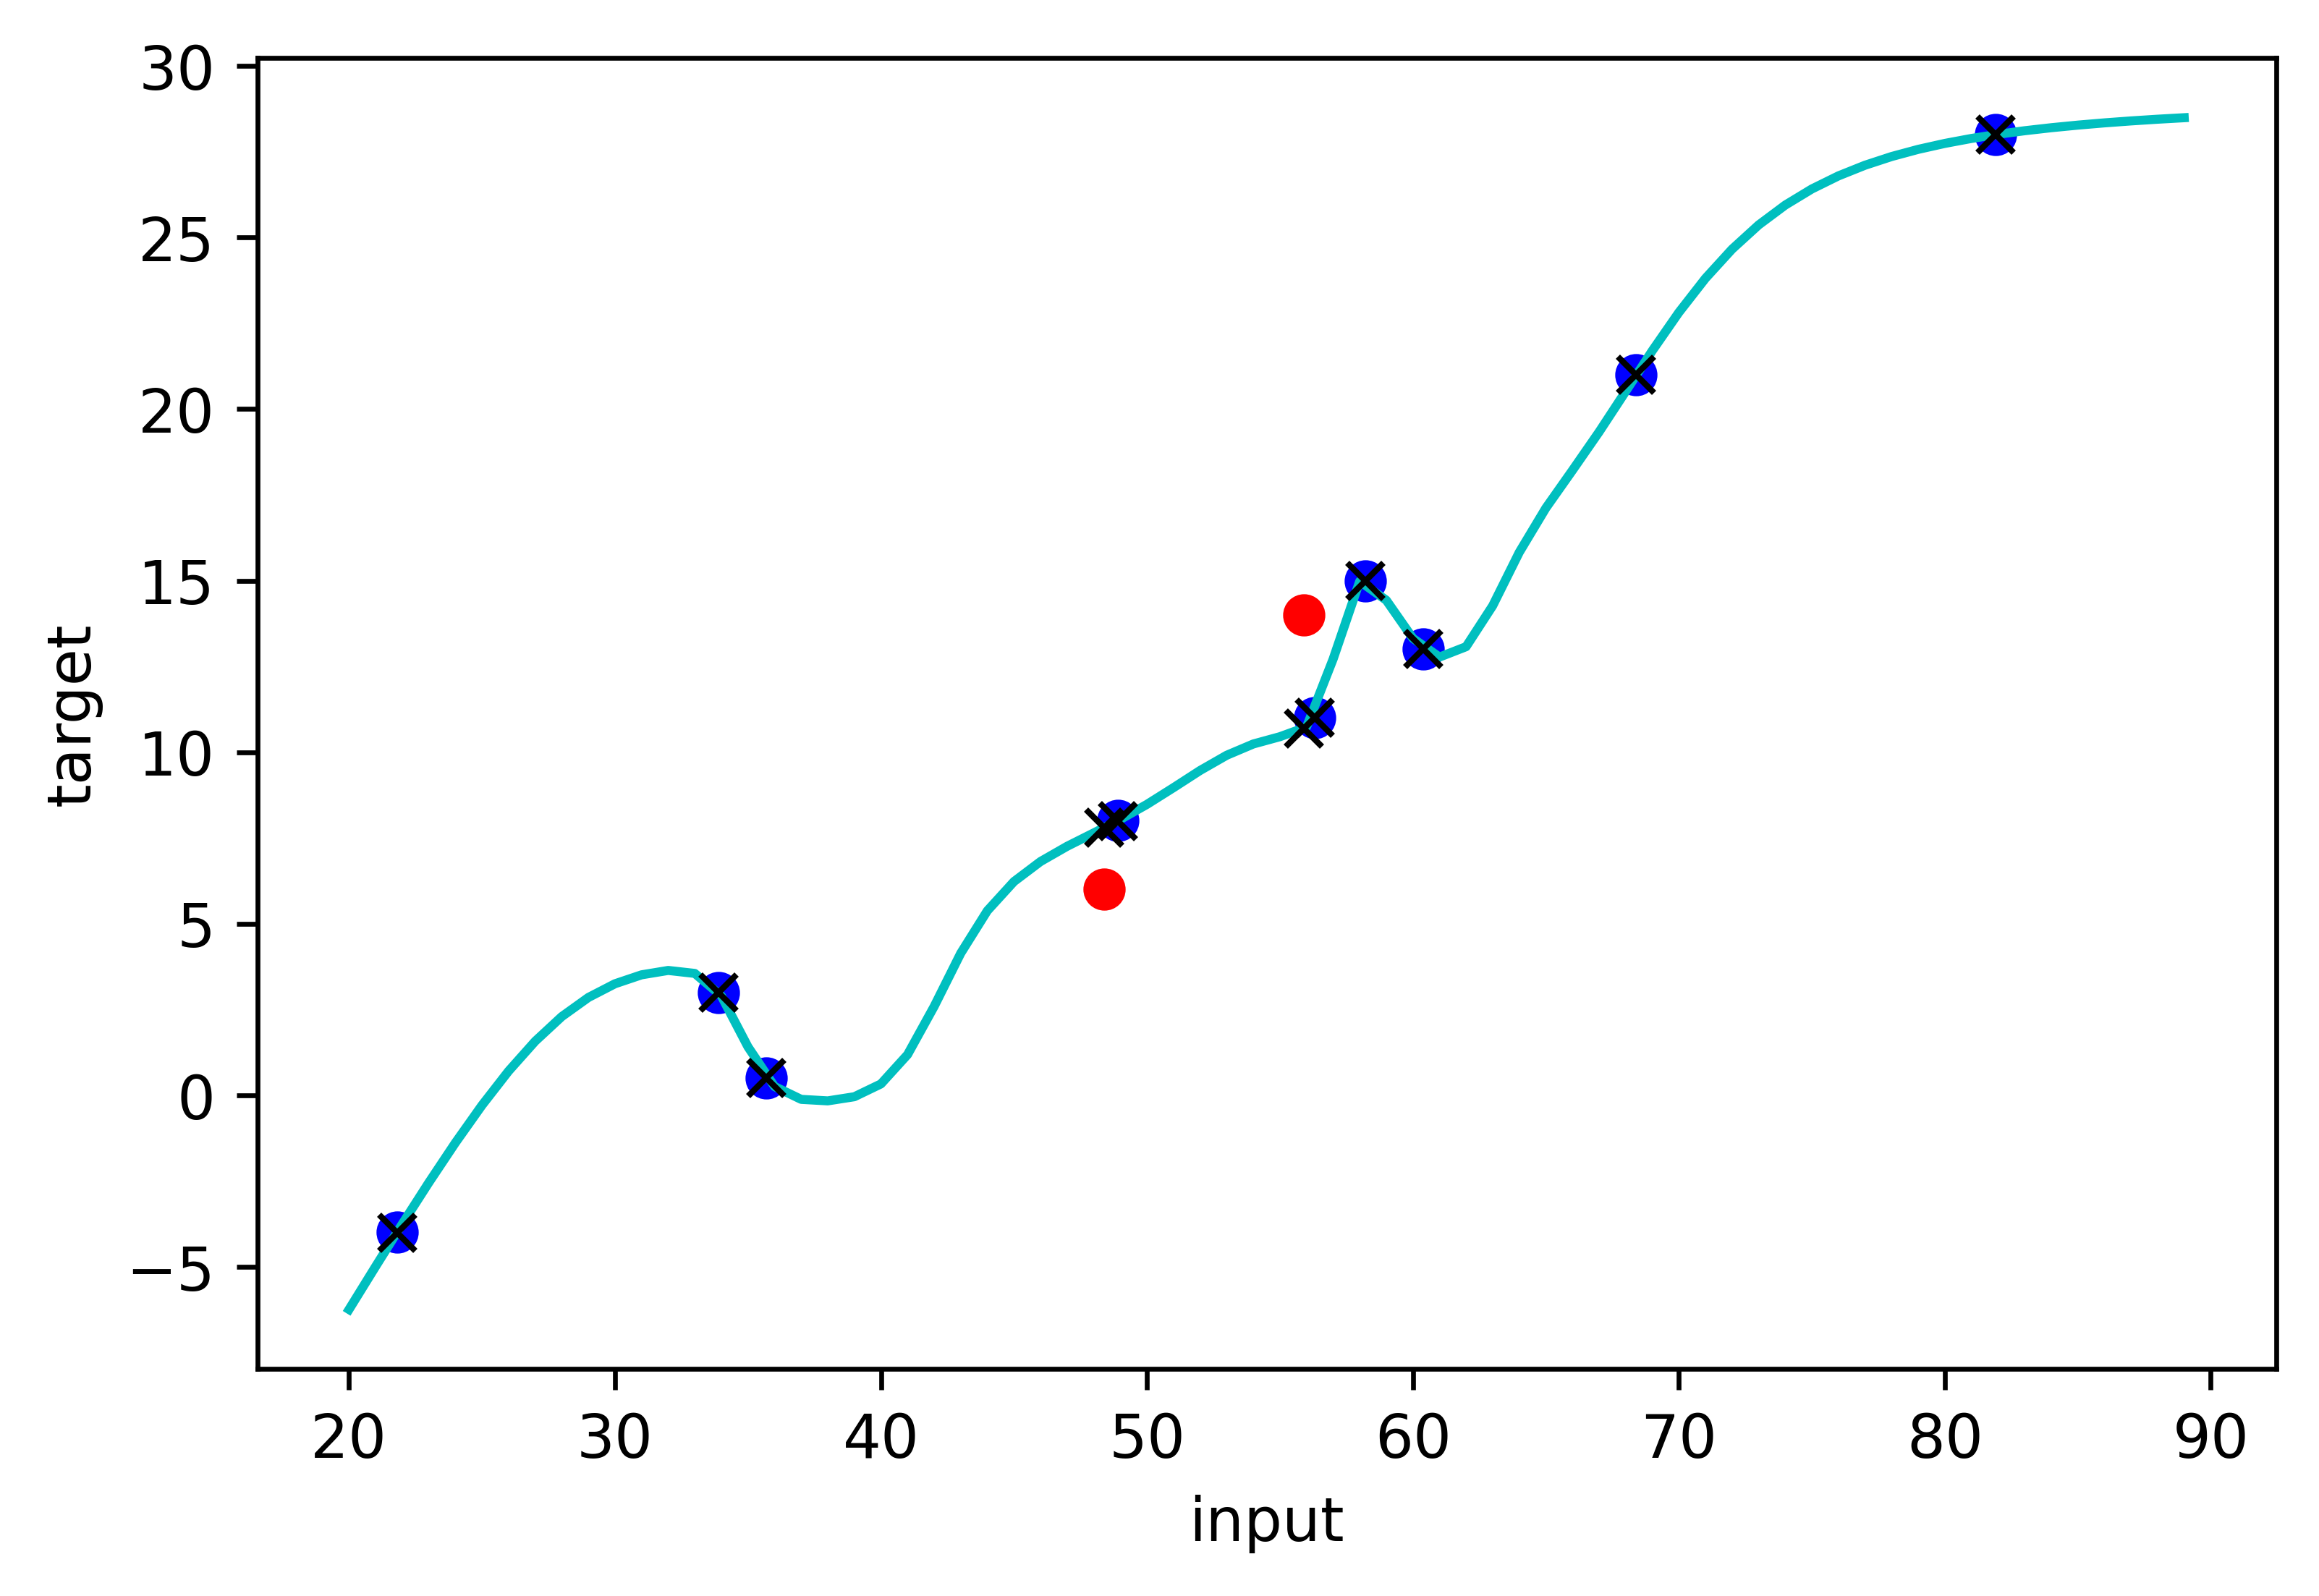

In [230]:
t_range = torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)

plt.xlabel('input')
plt.ylabel('target')
plt.plot(t_u_train.numpy(), t_c_train.numpy(), 'o', color='b')
plt.plot(t_u_val.numpy(), t_c_val.numpy(), 'o', color='r')
plt.plot(t_range.numpy(), seq_model(.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(.1 * t_u).detach().numpy(), 'kx')